## Problem statement
### Prepare a prediction model for profit of 50_startups data.

### Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Loading dataset

In [2]:
startups = pd.read_csv("50_startups.csv")

In [3]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startups.shape

(50, 5)

In [5]:
startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

### Observations :-

1.The dataset contains data about 50 startups. It has 5 columns: “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Profit”.

1.The first 3 columns indicate how much each startup spends on Research and Development, how much they spend on Marketing, and how much they spend on Administration cost.

3.The state column indicates which state the startup is based in and the last column states the profit made by the startup.

In [6]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### Observations :-

1.We can see that R&D spend, Administration, Marketing Spend and Profit consists of floating point data type values and State has object type values.

2.We can also see that all 21 observations are non null and hence we don't have any missing values


In [7]:
startups[startups.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


We don't have any duplicate values in our dataset. If duplicates values would have been present we would have to delete it.

### Summary

In [8]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Observations :-

1.The mean value and the median value (50% percentile) are not having much difference between them for all the columns.

2.There is not a big difference in the 75% value and max value for all the columns except Marketing Spend column. For Marketing Spend, the 75% value is at 299469 but max value is 471784 (almost double)

3.From observations 1 and 2, it looks like there is no outlier for R&D Spend, Administration and Profit. However, we can say there is a chance of outlier in Marketing Spend column. But we will be confirming that below with some other techniques (boxplot) as well.

## Understanding the target variable

We have to make a prediction model to predict the Profit of startups. So in this case our target variable is Profit.

In [9]:
startups['Profit'].unique()

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

### Observations :-

The Profit variable here is a continuous variable and is numerical data



In [10]:
startups['Profit'].value_counts()

118474.03    1
69758.98     1
81229.06     1
101004.64    1
124266.90    1
49490.75     1
192261.83    1
71498.49     1
156991.12    1
108733.99    1
78239.91     1
64926.08     1
144259.40    1
108552.04    1
97427.84     1
126992.93    1
105733.54    1
96712.80     1
96479.51     1
134307.35    1
99937.59     1
90708.19     1
182901.99    1
110352.25    1
42559.73     1
146121.95    1
89949.14     1
152211.77    1
35673.41     1
156122.51    1
166187.94    1
65200.33     1
149759.96    1
155752.60    1
191792.06    1
125370.37    1
107404.34    1
14681.40     1
111313.02    1
81005.76     1
105008.31    1
103282.38    1
132602.65    1
129917.04    1
122776.86    1
96778.92     1
77798.83     1
141585.52    1
191050.39    1
97483.56     1
Name: Profit, dtype: int64

### Observations :-

We could see that all the observations have only 1 count which means they are unique. There are no duplicates in our data

## Data visualization

Performing univariate analysis using boxplot. Boxplots are very intuitive for checking any outlier data

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R&D Spend'>

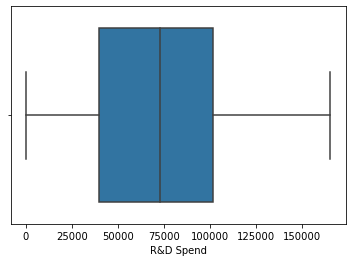

In [11]:
sn.boxplot(startups['R&D Spend'])

### Observations :-

1.There are no outliers in the R & D spend column.

2.The median line is at the centre of the box which means there is no skewness in the data.

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Administration'>

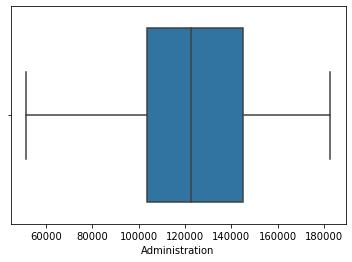

In [12]:
sn.boxplot(startups['Administration'])

### Observations :-

1.There are no outliers in the Administration column.

2.The median line is not at the centre of the box which means there is skewness in the data.

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marketing Spend'>

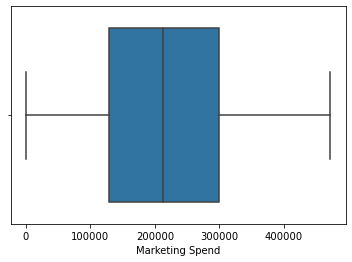

In [13]:
sn.boxplot(startups['Marketing Spend'])

### Observations :-

1.There are no outliers in the Marketing Spend column.

2.The median line is at the centre of the box which means there is no skewness in the data.


C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

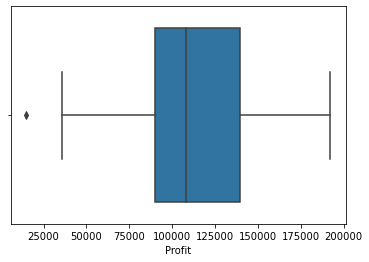

In [14]:
sn.boxplot(startups['Profit'])

### Observations :-

1.There is an outliers in the Profit column. The value is less than 25,000 which means the company made once very less profit.

2.The median line is towars the upper portion of the box which means there is positive skewness in the data.

## Dist plots

Dist plots are used to check the distribution of the data, peak value(the observation having the highest frequecy) and check for skewness in the data


C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

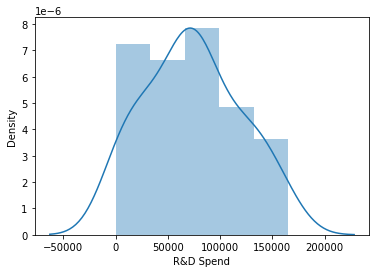

In [15]:
sn.distplot(startups['R&D Spend'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

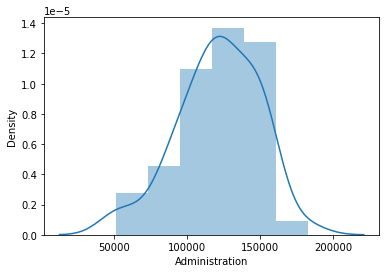

In [16]:
sn.distplot(startups['Administration'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

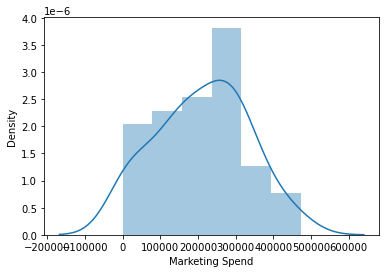

In [17]:
sn.distplot(startups['Marketing Spend'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

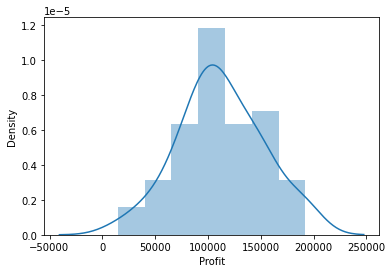

In [18]:
sn.distplot(startups['Profit'])

## Pair plots

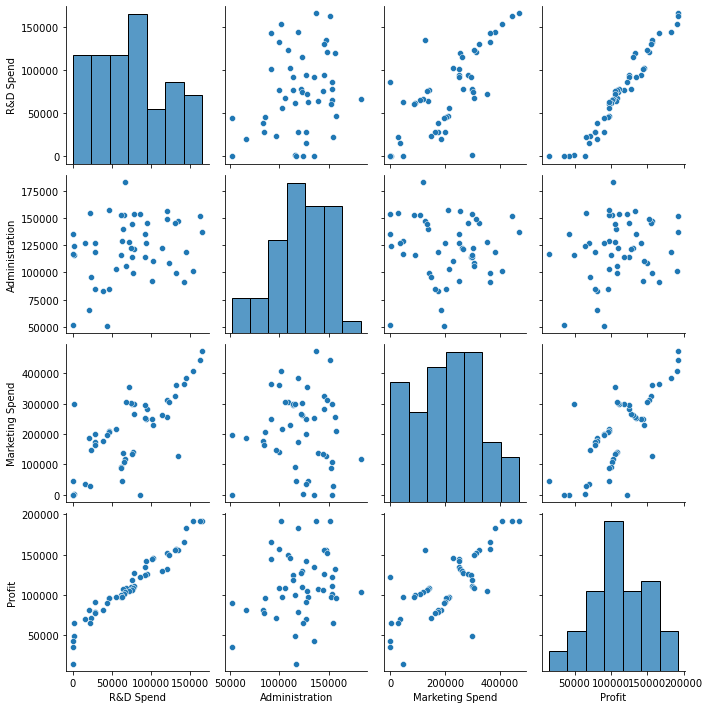

In [19]:
sn.pairplot(startups)

### Observations :-

1.There is an increase in Profit with increase in R & D spend. It means there is a positive correlation between them.

2.There exist a positive correlation between R & D spend and Marketing Spend as well.

3.It is difficult to determine correlation (increase/decrease) for other features. We will use heatmap and correlation function to determine it.



### Heatmap

Heatmap is a very effective technique to check the missing values in the dataset and to also understand if there is any correlation between the features of the data

<AxesSubplot:>

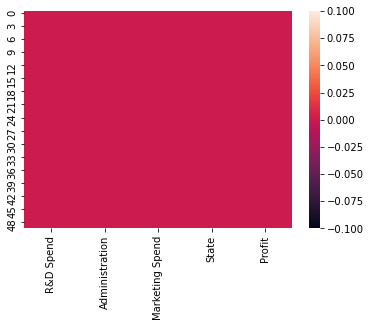

In [20]:
sn.heatmap(startups.isnull())

### Obervations :-

We don't have any missing values in our dataset. If it was present, there would be a different colour shade appearing on the red background.

We can check missing values by using isna() method as well.

In [21]:
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Correlation

The Correlation matrix is an important data analysis metric that is computed to summarize data to understand the relationship (correlation) between various variables and make decisions accordingly.

Correlation only works on the continuous variables and we have State variable which is a categorical variable. We need to convert the State variable into numerical values using Encoding techniques.



In [22]:
startups['State'].describe()

count             50
unique             3
top       California
freq              17
Name: State, dtype: object

We have total 50 states count and only 3 unique states so we can go for One Hot Encoding technique. If we had more number of unique states count then we would have used another Encoding Technique called as Label Encoding.

In [23]:
startups = pd.get_dummies(startups, columns=['State'])
startups.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


Now we can see that there are 3 more columns added for State

<AxesSubplot:>

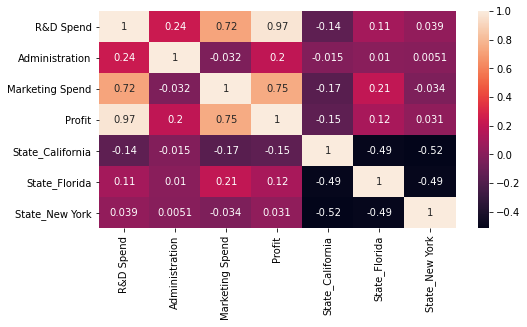

In [24]:
plt.figure(figsize=(8,4))
sn.heatmap(startups.corr(),annot = True)

## Finding correlation¶



In [25]:
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


### Observations :-

1.There exist a positive correlation between R&D spend and Marketing Spend with value 0.7.

2.There is a very high positive correlation with a value of 0.972 between Profit and R&D Spend as well.

3.The correlation value for Administration and R&D Spend is 0.24 so we can say there is very low correlation between them.

4.The correlation value for Administration and Marketing Spend is -0.03 so we can say there is negative correlation between them but it very low.

5.The correlation values between the states California, Florida and New York and Profit is very less (almost 0)

In [26]:
startups.rename(columns={'Marketing Spend':'Marketing'},inplace=True)

In [27]:
startups.rename(columns={'R&D Spend':'RD'},inplace=True)

In [28]:
startups.rename(columns={'State_New York':'State_NewYork'},inplace=True)

In [29]:
startups.head()

,RD,Administration,Marketing,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0



We need to standardize our data as we have used One Hot encoding technique and changed State variable. The scale is very different for States and the other variables so we will use Standard Scaler technique for standardizing the other variables

In [30]:
std = StandardScaler()
startup_std = std.fit_transform(startups)
startup_std = pd.DataFrame(startup_std, columns = startups.columns)

In [31]:
startup_std.head()

,RD,Administration,Marketing,Profit,State_California,State_Florida,State_NewYork
0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,1.776627,-0.717741,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.357740,-0.717741,1.457738,-0.717741


## Fitting a linear regression model

In [32]:
model = smf.ols('Profit~RD+Administration+Marketing+State_California+State_Florida+State_NewYork',data=startup_std).fit()

In [33]:
model.params

Intercept          -5.273559e-16
RD                  9.179307e-01
Administration     -1.877136e-02
Marketing           8.185781e-02
State_California   -6.031706e-04
State_Florida       1.730042e-03
State_NewYork      -1.100457e-03
dtype: float64


## t and p values

In [34]:
print(model.tvalues, '\n', model.pvalues)

Intercept          -1.576297e-14
RD                  1.736858e+01
Administration     -5.170116e-01
Marketing           1.573889e+00
State_California   -2.676515e-02
State_Florida       7.490466e-02
State_NewYork      -4.931619e-02
dtype: float64 
 Intercept           1.000000e+00
RD                  2.578772e-21
Administration      6.077373e-01
Marketing           1.226769e-01
State_California    9.787681e-01
State_Florida       9.406301e-01
State_NewYork       9.608905e-01
dtype: float64


## R squared values

In [35]:
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 14 Jul 2021   Prob (F-statistic):           1.34e-27
Time:                        19:17:22   Log-Likelihood:                 4.3255
No. Observations:                  50   AIC:                             3.349
Df Residuals:                      44   BIC:                             14.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.274e-16      0.033  -1.58e-14      1.000      -0.067       0.067
RD                   0.9179      0.053     17.369      0.000       0.811       1.024
Administration      -0.0188      0.036     -0.517      0.608      -0.092       0.054
Marketing            0.0819      0.052      1.574      0.123      -0.023       0.187
State_California    -0.0006      0.023     -0.027      0.979      -0.046       0.045
State_Florida        0.0017      0.023      0.075      0.941      -0.045       0.048
State_NewYork       -0.0011      0.022     -0.049      0.961      -0.046       0.044
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.31e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.7e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### If we observe the p values in above table, we can see that the p values are more than 0.05 for Administration, Marketing, State_California, State_Florida and State_NewYork as well.

#### We need to check how these variables individually affect Profit value. So we will build a Simple Linear Regression model for each variable and check the p values

## Simple Linear Regression between Profit and Administration

In [37]:
model_ad = smf.ols('Profit~Administration',data=startup_std).fit()

In [38]:
model_ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 14 Jul 2021   Prob (F-statistic):              0.162
Time:                        19:20:54   Log-Likelihood:                -69.919
No. Observations:                  50   AIC:                             143.8
Df Residuals:                      48   BIC:                             147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.274e-16      0.141  -3.73e-15      1.000      -0.284       0.284
Administration     0.2007      0.141      1.419      0.162      -0.084       0.485
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The p value is 0.162 which is greater than 0.05 and we also saw correlation value between Profit and Administration is very less which is 0.2.
#### We can say that the Administration variable is not important in predicting the Profit values

## Simple Linear Regression between Profit and Marketing Spend

In [39]:
model_mkt = smf.ols('Profit~Marketing',data=startup_std).fit()

In [40]:
model_mkt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 14 Jul 2021   Prob (F-statistic):           4.38e-10
Time:                        19:23:17   Log-Likelihood:                -50.470
No. Observations:                  50   AIC:                             104.9
Df Residuals:                      48   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.274e-16      0.096   -5.5e-15      1.000      -0.193       0.193
Marketing      0.7478      0.096      7.803      0.000       0.555       0.940
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We could see that the p-value for Marketing Spend is 0 which is less than 0.05 and also the correlation value between Profit and Marketing Spend is 0.75 so the Profit is actually dependent on Marketing Spend.
#### But when we used Marketing Spend to fit the model the p -value came as 0.123 (greater than 0.05). This means that Marketing Spend individually is affecting the Profit but when it is used by other features it is not. So we can say there is a multicollinearity problem and we will use VIF futher to check it.

## Simple Linear Regression between Profit and R&D Spend

In [41]:
model_rd = smf.ols('Profit~RD',data=startup_std).fit()

In [42]:
model_rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 14 Jul 2021   Prob (F-statistic):           3.50e-32
Time:                        19:25:05   Log-Likelihood:                 2.2714
No. Observations:                  50   AIC:                           -0.5428
Df Residuals:                      48   BIC:                             3.281
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.274e-16      0.033  -1.58e-14      1.000      -0.067       0.067
RD             0.9729      0.033     29.151      0.000       0.906       1.040
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We could see that the p-value for R&D Spend is 0 which is less than 0.05 and also the correlation value between Profit and R&D Spend is 0.97 so the Profit is actually dependent on R&D Spend.

## Simple Linear Regression between Profit and State_California¶

In [43]:
model_sc = smf.ols('Profit~State_California',data=startup_std).fit()

In [44]:
model_sc.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Wed, 14 Jul 2021   Prob (F-statistic):              0.312
Time:                        19:26:47   Log-Likelihood:                -70.409
No. Observations:                  50   AIC:                             144.8
Df Residuals:                      48   BIC:                             148.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.274e-16      0.143  -3.69e-15      1.000      -0.287       0.287
State_California    -0.1458      0.143     -1.021      0.312      -0.433       0.141
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.190
Skew:                           0.087   Prob(JB):                        0.909
Kurtosis:                       2.753   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We could see that the p-value for State_California is 0.312 which is more than 0.05 and also the correlation value between Profit and State_California is -0.15 so the Profit is actually not dependent on State_California variable.

## Simple Linear Regression between Profit and State_Florida

In [45]:
model_sf = smf.ols('Profit~State_Florida',data=startup_std).fit()

In [46]:
model_sf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Wed, 14 Jul 2021   Prob (F-statistic):              0.421
Time:                        19:28:17   Log-Likelihood:                -70.607
No. Observations:                  50   AIC:                             145.2
Df Residuals:                      48   BIC:                             149.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.274e-16      0.143  -3.68e-15      1.000      -0.288       0.288
State_Florida     0.1162      0.143      0.811      0.421      -0.172       0.404
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We could see that the p-value for State_Florida is 0.421 which is more than 0.05 and also the correlation value between Profit and State_Florida is 0.12 so the Profit is actually not dependent on State_Florida variable

## Simple Linear Regression between Profit and State_NewYork


In [47]:
model_sny = smf.ols('Profit~State_NewYork',data=startup_std).fit()

In [48]:
model_sny.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Wed, 14 Jul 2021   Prob (F-statistic):              0.829
Time:                        19:29:56   Log-Likelihood:                -70.922
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      48   BIC:                             149.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.274e-16      0.144  -3.66e-15      1.000      -0.290       0.290
State_NewYork     0.0314      0.144      0.217      0.829      -0.259       0.321
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We could see that the p-value for State_NewYork is 0.829 which is more than 0.05 and also the correlation value between Profit and State_NewYork is 0.031 so the Profit is actually not dependent on State_NewYork variable


## Calculating VIF as well to check collinearity

In [49]:
rsq_rd = smf.ols('RD~Administration+Marketing+State_California+State_Florida+State_NewYork',data=startup_std).fit().rsquared  
vif_rd = 1/(1-rsq_rd)

rsq_ad = smf.ols('Administration~RD+Marketing+State_California+State_Florida+State_NewYork',data=startup_std).fit().rsquared  
vif_ad = 1/(1-rsq_ad)

rsq_mkt = smf.ols('Marketing~RD+Administration+State_California+State_Florida+State_NewYork',data=startup_std).fit().rsquared  
vif_mkt = 1/(1-rsq_mkt) 

rsq_sc = smf.ols('State_California~RD+Administration+Marketing+State_Florida+State_NewYork',data=startup_std).fit().rsquared  
vif_sc = 1/(1-rsq_sc)

rsq_sf = smf.ols('State_Florida~RD+Administration+Marketing+State_California+State_NewYork',data=startup_std).fit().rsquared  
vif_sf = 1/(1-rsq_sf)

rsq_sny = smf.ols('State_NewYork~RD+Administration+Marketing+State_California+State_Florida',data=startup_std).fit().rsquared  
vif_sny = 1/(1-rsq_sny)


# Storing vif values in a data frame
d1 = {'Features':['RD','Administration','Marketing','State_California','State_Florida','State_NewYork'],'VIF':[vif_rd,vif_ad,vif_mkt,vif_sc,vif_sf,vif_sny]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

<ipython-input-49-011a72095acd>:11: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sc = 1/(1-rsq_sc)
<ipython-input-49-011a72095acd>:14: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sf = 1/(1-rsq_sf)
<ipython-input-49-011a72095acd>:17: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sny = 1/(1-rsq_sny)


,Features,VIF
0,RD,2.495511
1,Administration,1.177766
2,Marketing,2.416797
3,State_California,inf
4,State_Florida,inf
5,State_NewYork,inf


#### Here, VIF value is infinite for the State variables, so we can confirm collinearlity does not exist between them
#### From the above Simple Regression models and VIF values we can say that the States and Administration are not significant variaables for predicting the Profit values.
#### We will build a model using R&D Spend and Marketing Spend

## Simple Linear Regression between Profit and R&D Spend, Marketing Spend¶


In [50]:
model_rd_m = smf.ols('Profit~RD+Marketing',data=startup_std).fit()

In [52]:
model_rd_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 14 Jul 2021   Prob (F-statistic):           2.16e-31
Time:                        19:33:48   Log-Likelihood:                 4.1726
No. Observations:                  50   AIC:                            -2.345
Df Residuals:                      47   BIC:                             3.391
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.274e-16      0.032  -1.62e-14      1.000      -0.065       0.065
RD             0.9072      0.047     19.266      0.000       0.812       1.002
Marketing      0.0907      0.047      1.927      0.060      -0.004       0.185
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
(model_mkt.rsquared,model_mkt.aic)

(0.5591535746115515, 104.94091802371327)

In [54]:
(model_rd.rsquared,model_rd.aic)

(0.9465353160804392, -0.5428445147422991)

#### On comparing the R squared and AIC values for Marketing and R & D Spend, we can see that R square value is more and AIC value is less for R&D Spend . So R & D Spend variable is enough to predict the Profit value

In [55]:
(model_rd.rsquared,model_rd.rsquared_adj)

(0.9465353160804392, 0.9454214684987816)

## Model validation using Residual analysis

### Q-Q plot to check normality of errors

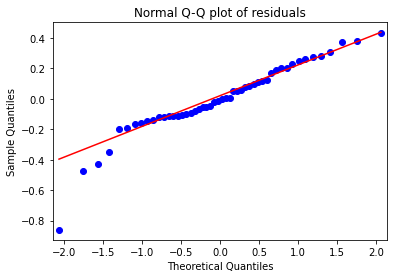

In [56]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_rd.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [57]:
list(np.where(model_rd.resid<-0.8))


[array([49], dtype=int64)]

We can see most of the points are very close and on the line in the above plot. Although, there is a data point (observation no.49) that is very far away from the straight line and we will try to remove the influencer point with the help of Cook's distance, Hat - point method later below.

## Residual Plot for Homoscedasticity

In [58]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

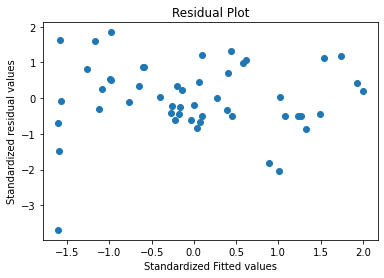

In [59]:
plt.scatter(get_standardized_values(model_rd.fittedvalues),
            get_standardized_values(model_rd.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()


There is no pattern in the Residual plot, so we can say there is a linear relation and no error variance

### Residuals vs Regressors

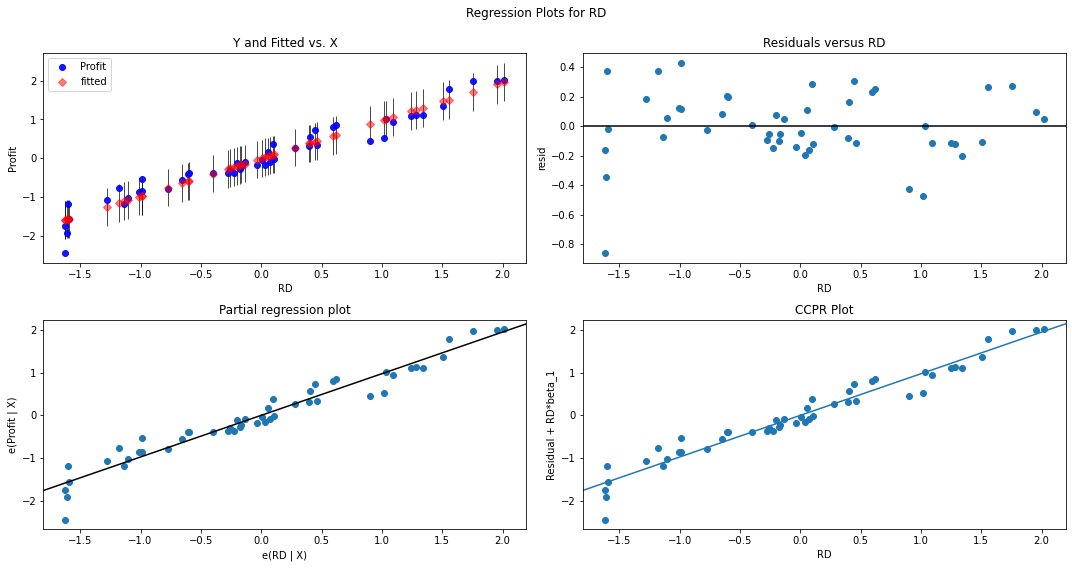

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_rd, "RD", fig=fig)
plt.show()

There is no pattern in the Residual vs R & D Spend plot, so we can say there is a linear relation and no error variance

## Model Deletion Diagnostics

### Detecting Influencers/Outliers using Cook's distance¶

In [61]:
model_influence = model_rd.get_influence()
(c, _) = model_influence.cooks_distance

## Plot the influencers values using stem plot

fig = plt.subplots(figsize=(20, 7)) plt.stem(np.arange(len(star)), np.round(c, 3)) plt.xlabel('Row index') plt.ylabel('Cooks Distance') plt.show()

In [62]:
(np.argmax(c),np.max(c))

(49, 0.562061025926428)

We can see that the 49th observation is an Influencer point and has more distance than other data points. We will delete this data point to further increase our accuracy

## Improving the model

In [63]:
startup=startup_std.drop(startup_std.index[[49]],axis=0).reset_index()

In [64]:
startup.shape

(49, 8)

In [65]:
startup.head()

,index,RD,Administration,Marketing,Profit,State_California,State_Florida,State_NewYork
0,0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741
3,3,1.554784,-0.096365,1.422210,1.776627,-0.717741,-0.685994,1.393261
4,4,1.504937,-1.079919,1.281528,1.357740,-0.717741,1.457738,-0.717741


## Build the model

In [66]:
final_model= smf.ols('Profit~RD',data = startup).fit()

In [67]:
(final_model.rsquared,final_model.rsquared_adj)

(0.9573395972488337, 0.9564319291051918)

#### The adjusted R sqaured value of the model is 0.95

## Predicting for new data


In [68]:
new_data=pd.DataFrame({'RD':100000},index=[1])

In [69]:
final_model.predict(new_data)

1    94277.81544
dtype: float64

#### For a R&D Spend value of 100000, we will have a Profit of 94277.81544 approx

## Problem statement

### A large Toyoto car dealership rolled out used cars exchange offer for a new car. The data was collected on all previous sales of used Toyoto cars at the dealership. To ensure a reasonable profit, the dealer needs to be able to predict the price that the dealership will get for used cars.

## Importing the libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sn

In [12]:
car_df = pd.read_csv("Toyoto_Corrola.csv")

In [13]:
car_df.head()


,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170



### Renaming the column Age_08_04 to Age

In [14]:
car_new_df = car_df.rename(columns={'Age_08_04':'Age'})

In [15]:
car_new_df.head()

,Id,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


### Dropping the column ID

In [16]:
car_price= car_new_df.drop('Id',axis=1)

In [17]:
car_price.head()

,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


## Data Insights

In [18]:
car_price.shape

(1436, 9)

In [19]:
car_price.columns

Index(['Model', 'Price', 'Age', 'KM', 'HP', 'Doors', 'Cylinders', 'Gears',
       'Weight'],
      dtype='object')

### Observations :-

The datset contains 1436 observations of cars with its details like Model, Price, Age, KM, HP, Doors, Cylinders, Gears and Weights. Column description :- Model -> the car model Price -> price of the car Age -> how old the car is KM -> how much kilometres the car has travelled Doors -> how many doors the car has Cylinders -> how many cylinders the car has Gears -> how many gears the car has Weight -> weight of the car

In [20]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Model      1436 non-null   object
 1   Price      1436 non-null   int64 
 2   Age        1436 non-null   int64 
 3   KM         1436 non-null   int64 
 4   HP         1436 non-null   int64 
 5   Doors      1436 non-null   int64 
 6   Cylinders  1436 non-null   int64 
 7   Gears      1436 non-null   int64 
 8   Weight     1436 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 101.1+ KB


### Observations :-

We can see that apart from Model column which is of object type, all other columns are of int64 data type.
Also all the 1436 observations are non-null type, which means we don't have any missing values in our data.

In [21]:
car_price[car_price.duplicated()]

,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight


## Summary

In [22]:
car_price.describe()

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.00000


### Observations :-
1.The mean value and the median value (50% percentile) are not having much difference between them for all the columns.

2.There is not a big difference in the 75% value and max value for all the columns except Marketing Spend column. For Marketing Spend, the 75% value is at 299469 but max value is 471784 (almost double)

3.From observations 1 and 2, it looks like there is no outlier for R&D Spend, Administration and Profit. However, we can say there is a chance of outlier in Marketing Spend column. But we will be confirming that below with some other techniques (boxplot) as well.

## Understanding the target variable

We have to make a prediction model to predict the Price of cars which dealer will get after selling cars. So in this case our target variable is Profit.

In [23]:
car_price['Price'].unique()

array([13500, 13750, 13950, 14950, 12950, 16900, 18600, 21500, 20950,
       19950, 19600, 22500, 22000, 22750, 17950, 16750, 16950, 15950,
       16250, 17495, 15750, 15500, 14750, 19000, 15800, 21950, 20500,
       13250, 15250, 18950, 15999, 16500, 18750, 22250, 12995, 18450,
       16895, 14900, 17250, 15450, 16650, 17450, 16450, 18900, 18990,
       18500, 19450, 18800, 32500, 31000, 31275, 24950, 22950, 24990,
       17900, 19250, 16350, 21750, 15850, 23000, 19900, 23950, 24500,
       17200, 19500, 16868, 19750, 20750, 17650, 17795, 18245, 23750,
       18700, 21125,  6950,  9500, 11950,  7750,  4350,  4750, 11750,
       11900,  9950, 11495, 11250, 10500, 10450, 11500, 12500, 10950,
       11450, 11790, 12450, 11690, 12750, 11925, 12900, 11650, 10850,
        9940, 13450, 12495, 12000, 11480, 14990, 12850, 11700, 11895,
       13875, 12295, 13995,  9900, 11990, 10750, 11695, 11000, 12400,
       12200, 12695, 14350, 10250,  6500,  6400,  7000,  8900,  8500,
        8950,  9250,

In [24]:
car_price['Price'].value_counts()

8950     109
9950      84
7950      63
10950     62
11950     47
        ... 
5150       1
9245       1
16350      1
11710      1
6150       1
Name: Price, Length: 236, dtype: int64

### Observations :-

1.We could see that the car prices are same for many cars.

2.109 cars have the same price of 8950, 84 cars with same price of 9950, etc.

## Data visualization

Performing univariate analysis using boxplot. Boxplots are very intuitive for checking any outlier data

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

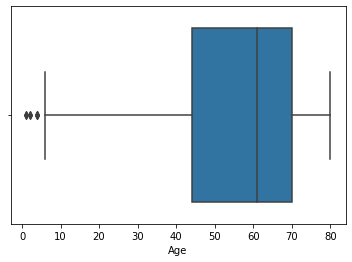

In [25]:
sn.boxplot(car_price['Age'])

### Observations :-

1.The boxplot of Age columns shows that the values of Age ranges from 0 to 80 (approximately).

2.The median line is towards the lower half of the box, which means the data is negatively skewed.

3.There are few outlier points which are less than value of 10.

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KM'>

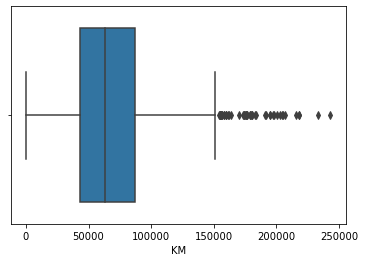

In [26]:
sn.boxplot(car_price['KM'])

### Observations :-
1.The values of KM ranges from 0 to 150000 (approximately).

2.There are lot of outlier data points

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HP'>

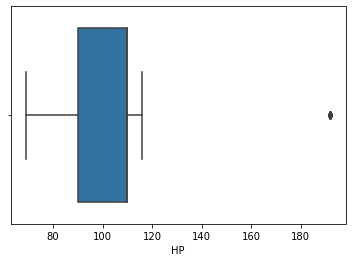

In [27]:
sn.boxplot(car_price['HP'])

### Observations :-
1.The values of HP ranges from 70 to 120 (approximately).

2.There is an outlier data point with a value of more than 180.

3.The median line and 75% percentile line are overlapping with each other.

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Doors'>

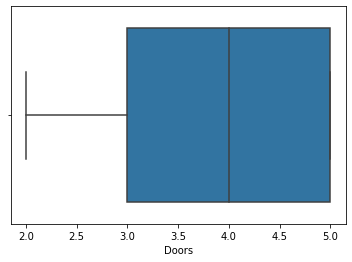

In [28]:
sn.boxplot(car_price['Doors'])


### Observations :-
1.The values of Doors ranges from 2 to 5.

2.There are no outlier data points.

3.The 75 % value is equal to the max value so there is no upper whisker line in the boxplot

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cylinders'>

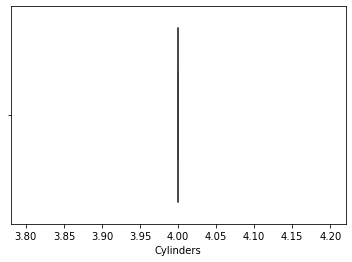

In [29]:
sn.boxplot(car_price['Cylinders'])

### Observations :-

We can see only a single line for Cylinder which means all the data points have the same value of 4.

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gears'>

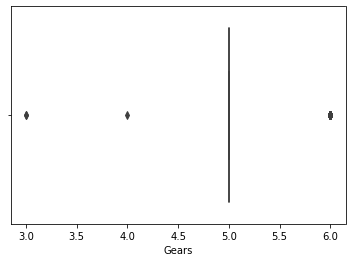

In [30]:
sn.boxplot(car_price['Gears'])

### Observations :-

We can see only a single line and few points for Gears which means almost all the data points have the same value of 5.
We have 3 outliers points

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

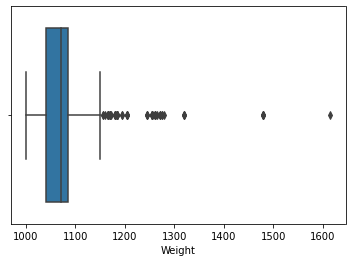

In [31]:
sn.boxplot(car_price['Weight'])

### Observations :-

The Weight value ranges from 1000 to 1500 (approx)
There are outlier data points

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

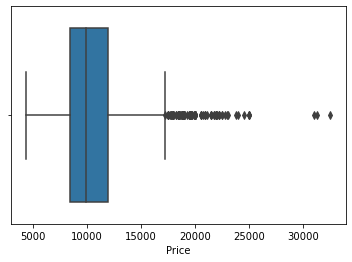

In [32]:
sn.boxplot(car_price['Price'])

### Observations :-

1.The boxplot shows the lower whiser value from 5000 to 17000 (approx.)

2.There are many outlier data points

## Dist plots

Dist plots are used to check the distribution of the data, peak value(the observation having the highest frequecy) and check for skewness in the data

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

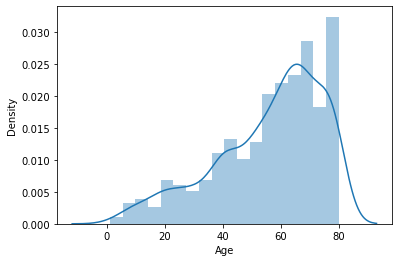

In [33]:
sn.distplot(car_price['Age'])

### Observations :-

We can see there is a negative skewness in the Age data

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KM', ylabel='Density'>

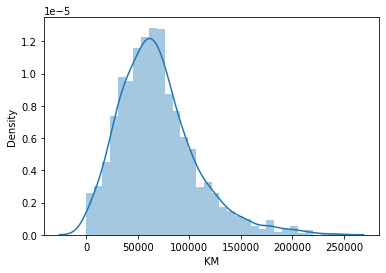

In [34]:
sn.distplot(car_price['KM'])

### Observations :-

We can see there is a positive skewness in the data in KM feature

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HP', ylabel='Density'>

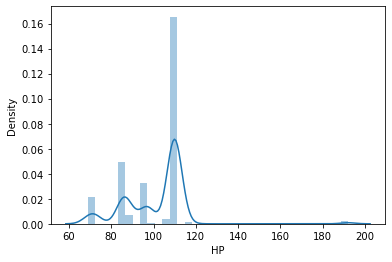

In [35]:
sn.distplot(car_price['HP'])

### Observations :-

We can see the data is very highly positive skewed

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Doors', ylabel='Density'>

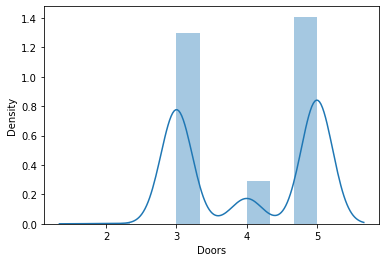

In [36]:
sn.distplot(car_price['Doors'])

### Observations :-

The data distribution is bimodal. There are lot of data points having both values 3 and 5

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Cylinders', ylabel='Density'>

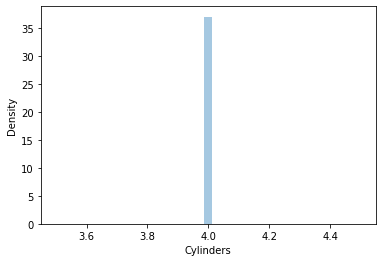

In [37]:
sn.distplot(car_price['Cylinders'])

### Observations :-

All the data points are having same value of 4.

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gears', ylabel='Density'>

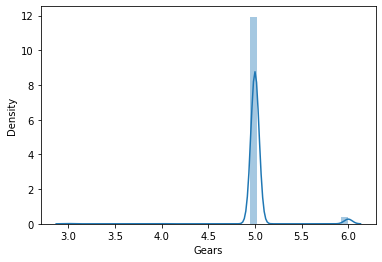

In [38]:
sn.distplot(car_price['Gears'])

### Observations :-

The data is spread from 3 to 6 but most of the data points are having a value of 5

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

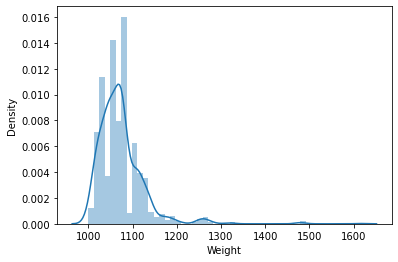

In [39]:
sn.distplot(car_price['Weight'])

### Observations :-

We can see the data is highliy positively skewed

## Pair plots

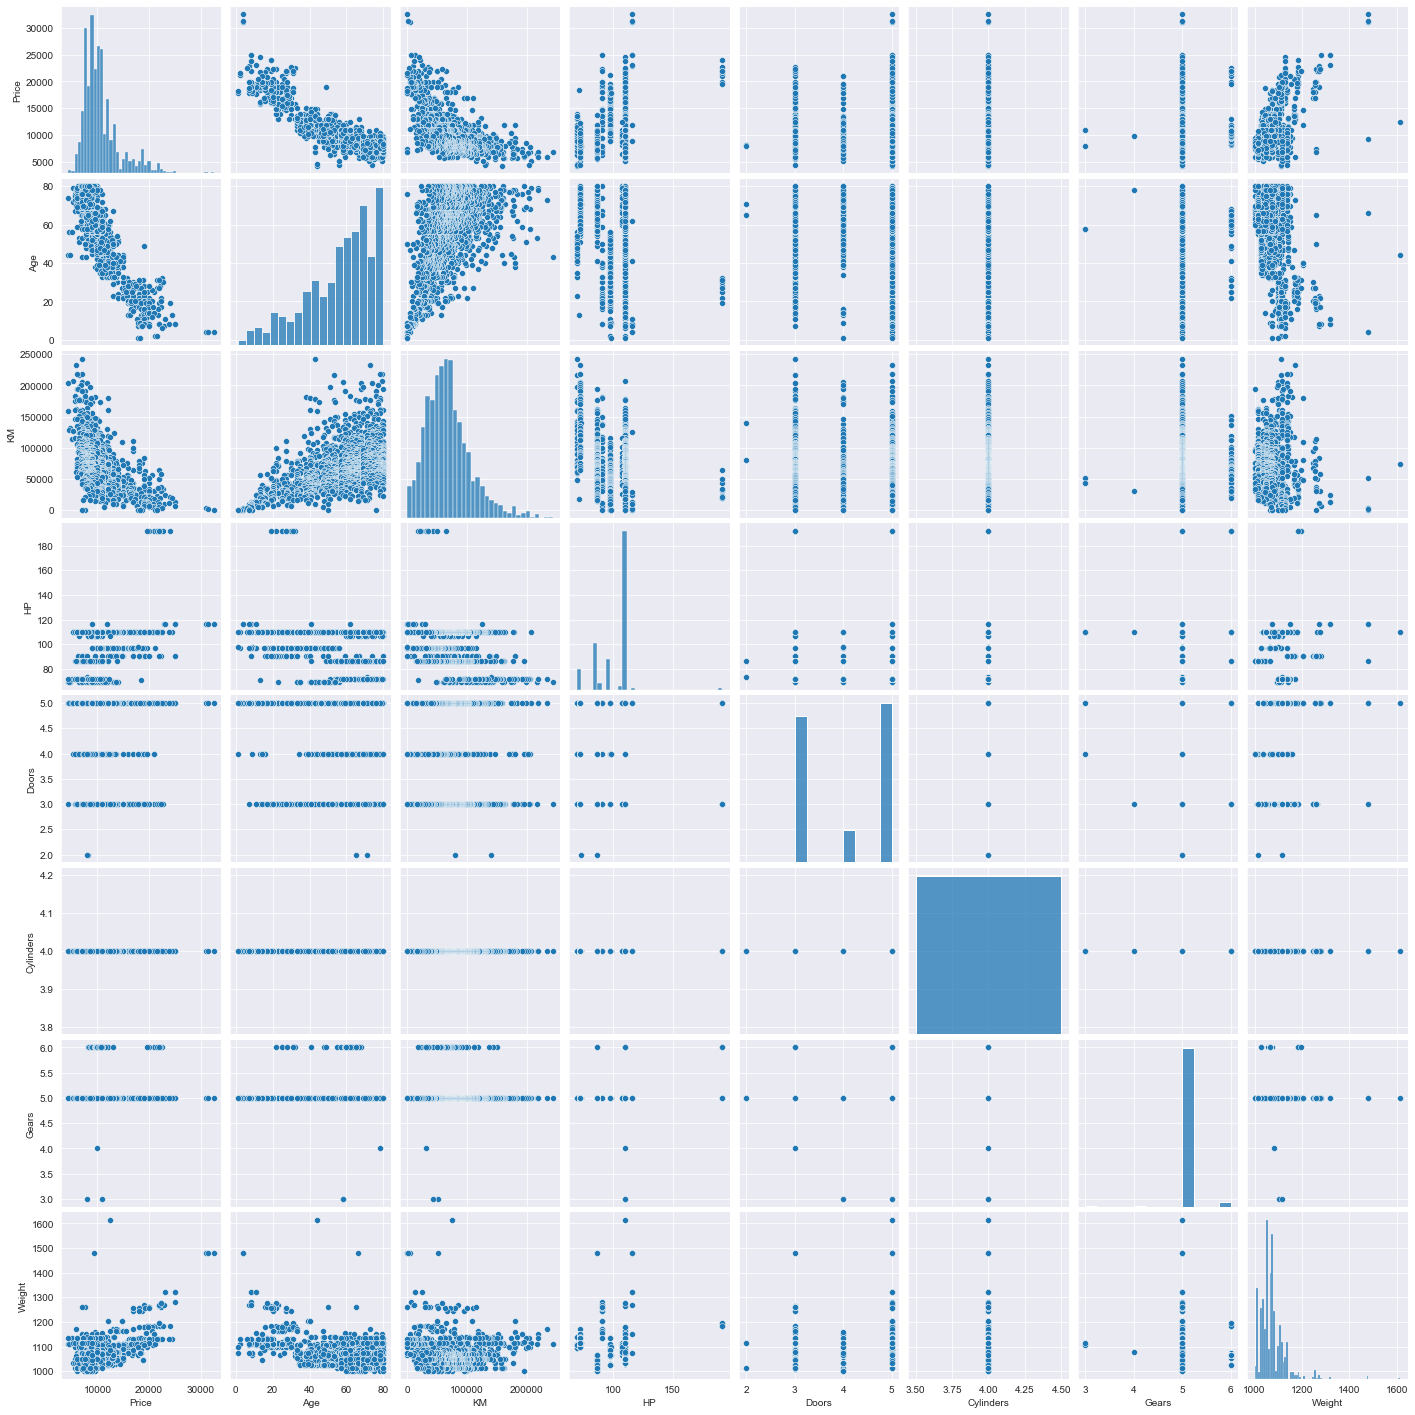

In [40]:
sn.set_style(style='darkgrid')
sn.pairplot(car_price)

## Heatmaps
Heatmap is a very effective technique to check the missing values in the dataset and to also understand if there is any correlation between the features of the data

<AxesSubplot:>

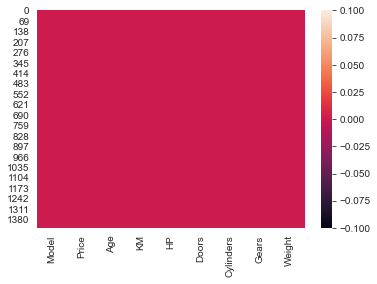

In [41]:
sn.heatmap(car_price.isnull())

### Observations :-

We don't have any missing values in our dataset. If it was present, there would be a different colour shade appearing on the red background.
We can check missing values by using isna() method as well.

In [42]:
car_price.isna().sum()

Model        0
Price        0
Age          0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

## Correlation

The Correlation matrix is an important data analysis metric that is computed to summarize data to understand the relationship (correlation) between various variables and make decisions accordingly.

<AxesSubplot:>

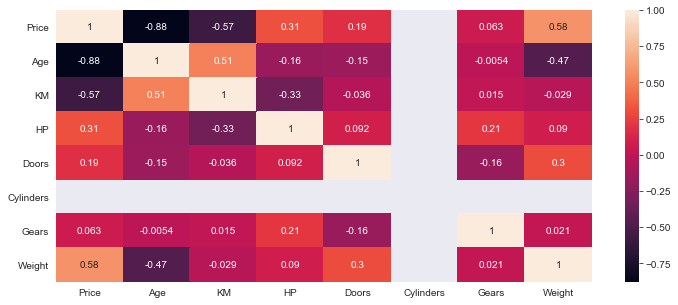

In [43]:
plt.figure(figsize=(12,5))
sn.heatmap(car_price.corr(),annot = True)

In [44]:
car_price.corr()

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


### Observations :-
The cylinders show correlation value as NaN, as the cylinder value is 4 (constant throughout the dataset)

## Fitting a linear regression model

In [45]:
model = smf.ols('Price~Age+KM+HP+Doors+Cylinders+Gears+Weight',data=car_price).fit()


In [46]:
model.params

Intercept    -410.845504
Age          -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Cylinders   -1643.382016
Gears         622.282925
Weight         18.609651
dtype: float64

In [47]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.323309
Age         -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Cylinders    -5.323309
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age          4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Cylinders     1.181900e-07
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:17:31   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -410.8455     77.179     -5.323      0.000    -562.241    -259.450
Age         -122.2422      2.616    -46.729      0.000    -127.374    -117.111
KM            -0.0200      0.001    -16.543      0.000      -0.022      -0.018
HP            28.3501      2.615     10.842      0.000      23.221      33.479
Doors         -9.6802     39.992     -0.242      0.809     -88.129      68.769
Cylinders  -1643.3820    308.714     -5.323      0.000   -2248.964   -1037.800
Gears        622.2829    197.410      3.152      0.002     235.038    1009.528
Weight        18.6097      0.829     22.447      0.000      16.983      20.236
==============================================================================
Omnibus:                      199.596   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1569.510
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       8.065   Cond. No.                     7.47e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Here we have all the features with less than 0.05 p value, so there is no multicollinearity problem

## R squared values

In [49]:
(model.rsquared,model.rsquared_adj)

(0.8628024511073656, 0.8622263942190831)

## Calculating VIF as well to check collinearity

In [50]:
rsq_age = smf.ols('Age~KM+HP+Doors+Cylinders+Gears+Weight',data=car_price).fit().rsquared  
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age+HP+Doors+Cylinders+Gears+Weight',data=car_price).fit().rsquared  
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age+KM+Doors+Cylinders+Gears+Weight',data=car_price).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

rsq_doors = smf.ols('Doors~Age+KM+HP+Cylinders+Gears+Weight',data=car_price).fit().rsquared  
vif_doors = 1/(1-rsq_doors) 

rsq_cylinders = smf.ols('Cylinders~Age+KM+HP+Doors+Gears+Weight',data=car_price).fit().rsquared  
vif_cylinders = 1/(1-rsq_cylinders)

rsq_gears = smf.ols('Gears~Age+KM+HP+Doors+Cylinders+Weight',data=car_price).fit().rsquared  
vif_gears = 1/(1-rsq_gears)

rsq_weight = smf.ols('Weight~Age+KM+HP+Doors+Cylinders+Gears',data=car_price).fit().rsquared  
vif_weight = 1/(1-rsq_weight)

# Storing vif values in a data frame
d1 = {'Features':['Age','KM','HP','Doors','Cylinders','Gears','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_doors,vif_cylinders,vif_gears,vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

C:\Users\Vishal\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
0,Age,1.874542
1,KM,1.627039
2,HP,1.214909
3,Doors,1.149301
4,Cylinders,0.000000
5,Gears,1.096501
6,Weight,1.508041


Here, VIF value is <20 for all the variables, so we can confirm collinearlity does not exist

## Residual analysis
### Test for Normality of Residuals (Q-Q Plot)

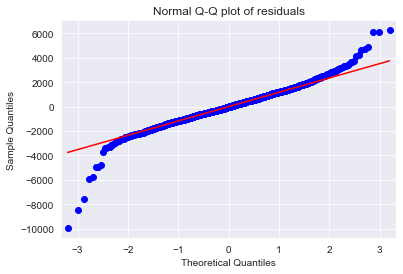

In [51]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

We can see most of the points are very close and on the line in the above plot. Although, there are few data points that are away from the straight line and we will try to remove those influencer points with the help of Cook's distance, Hat - point method.

## Residual Plot for Homoscedasticity

In [52]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

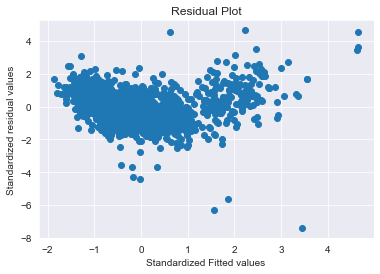

In [53]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Residuals vs Regressors¶
### For Age

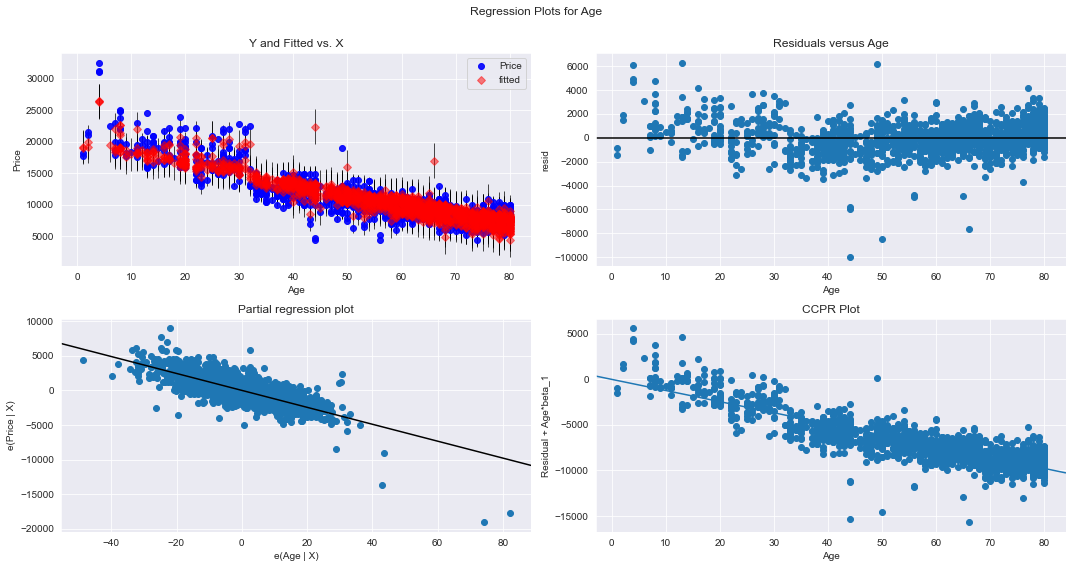

In [54]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

### For KM

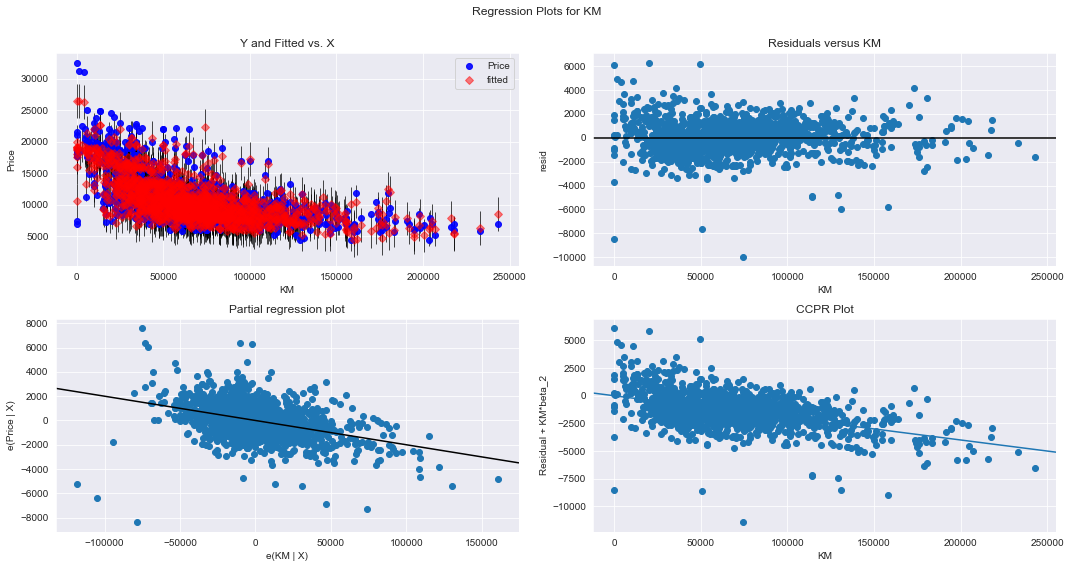

In [55]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

### For HP

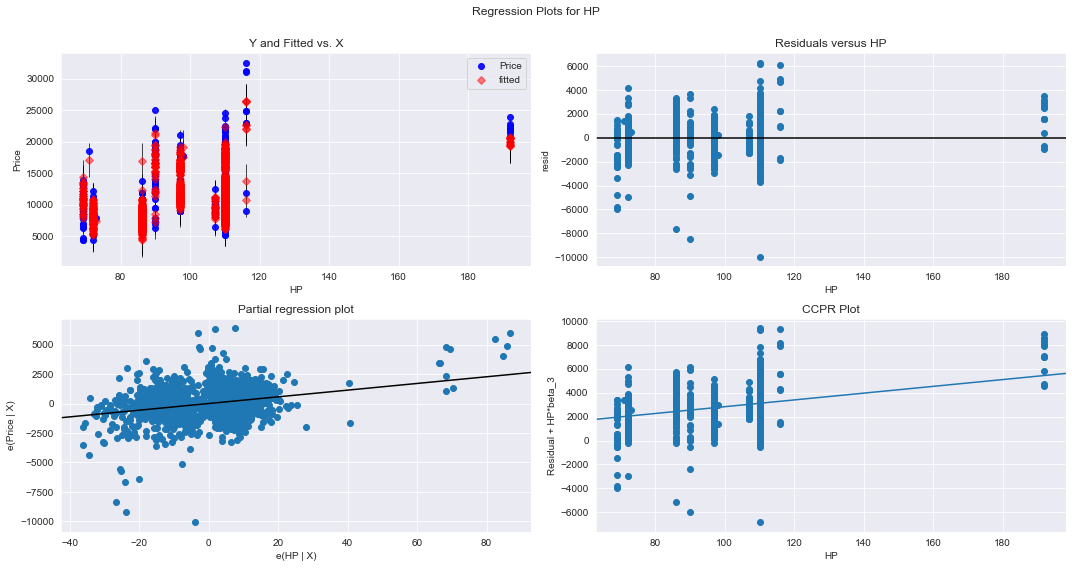

In [56]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()


### For Doors

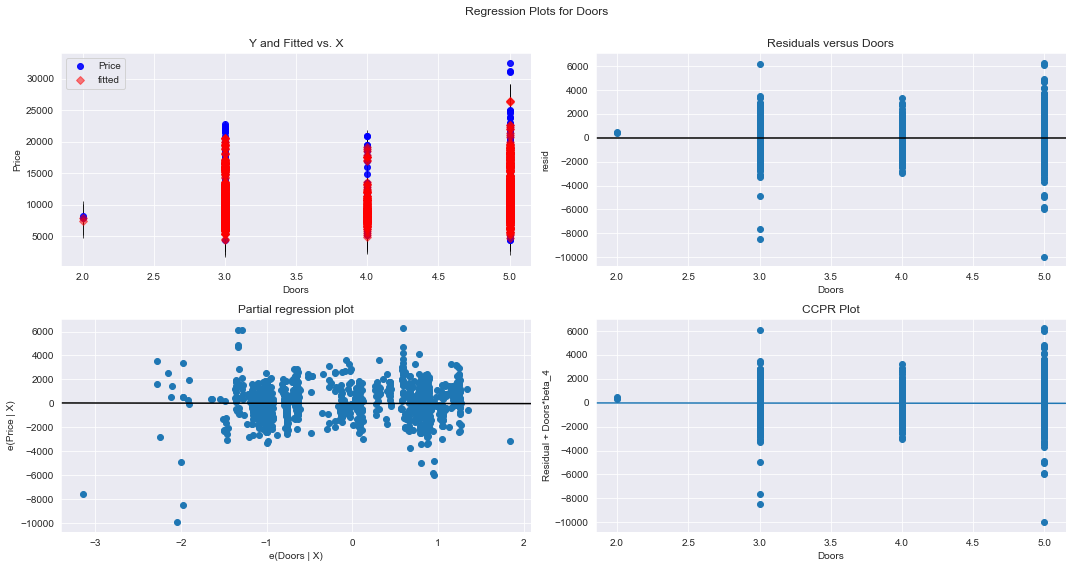

In [57]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()


### For Gears

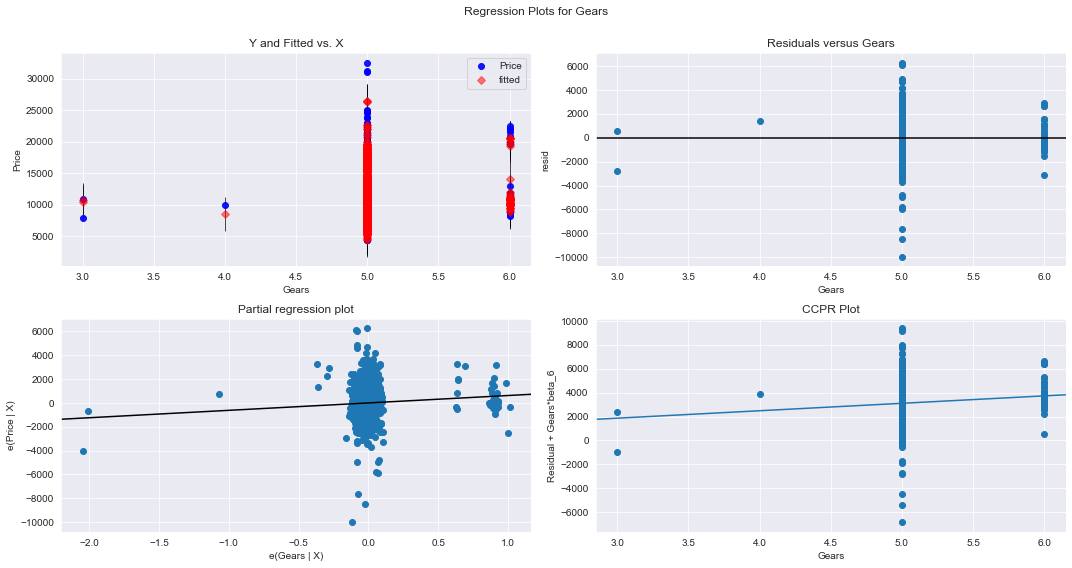

In [58]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

### For Weight

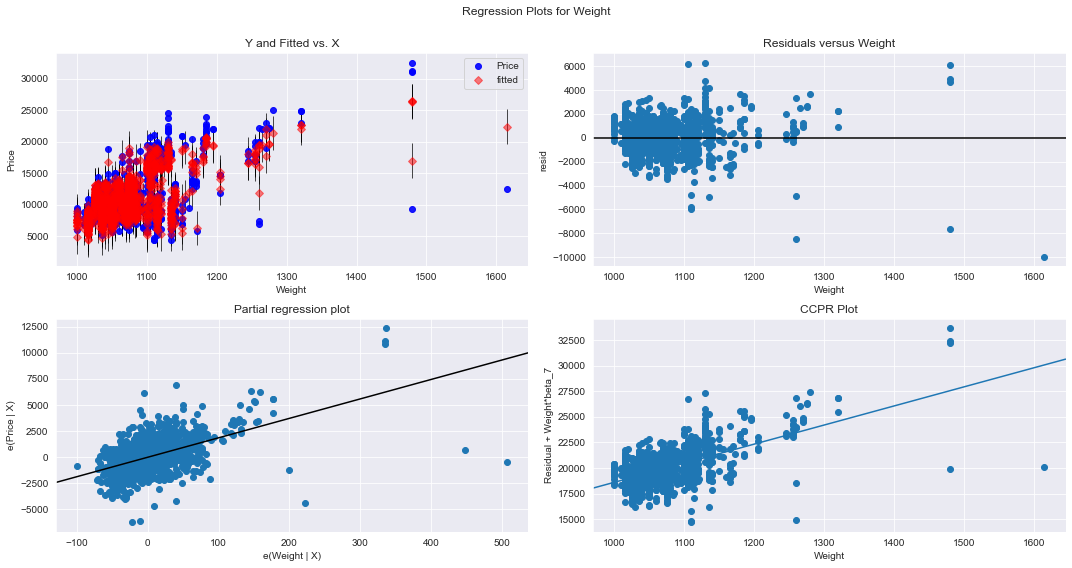

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

## Model Deletion Diagnostics
### Using Cook's distance to detect Influencers/Outliers

In [60]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

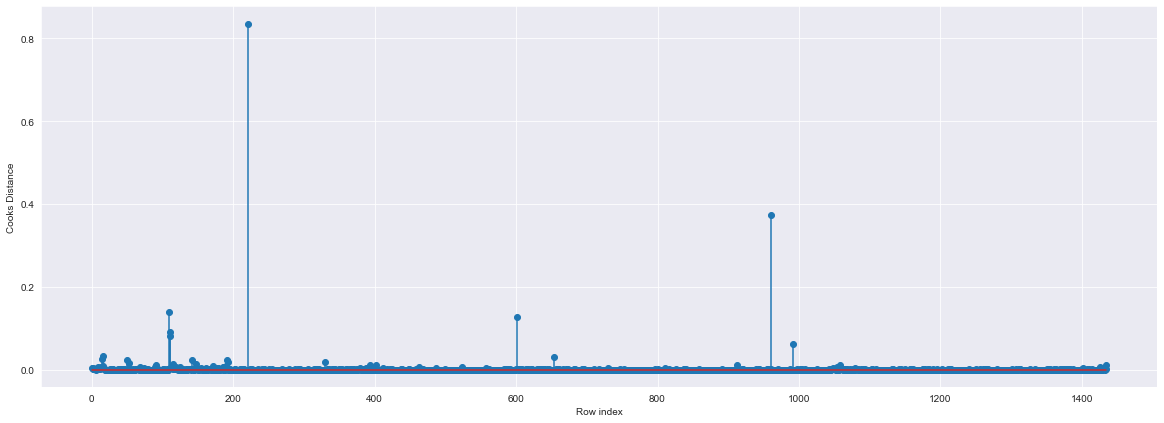

In [61]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(car_price)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()


In [62]:
(np.argmax(c),np.max(c))

(221, 0.8359007508852095)

### High Influence points

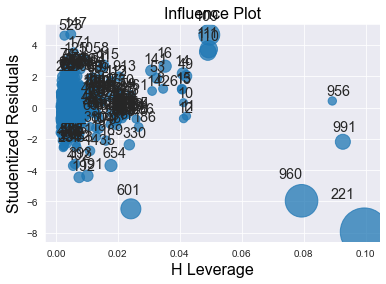

In [63]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [64]:
k = car_price.shape[1]
n = car_price.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [65]:
leverage_cutoff

0.020891364902506964

From the above plot, we can see that the data points 601,960,991,956,221 are influencers (age,km features specifically)

In [66]:
car_price[car_price.index.isin([601,960,221,991,956])]

,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
221,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,74172,110,5,4,5,1615
601,TOYOTA Corolla 2.0 d HB Diesel 2/3-Doors,7500,50,1,90,3,4,5,1260
956,TOYOTA Corolla 1.6 Linea Luna Aut. 4/5-Doors,10950,58,51421,110,5,4,3,1105
960,TOYOTA Corolla,9390,66,50806,86,3,4,5,1480
991,TOYOTA Corolla 1.6 Lin.Terra Aut. 4/5-Doors,7950,58,43000,110,4,4,3,1114


In [67]:
car_price.head()

,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


### Improving the model
Discard the data points which are influencers and reasign the row number (reset_index())

In [68]:
toyoto =car_price.drop(car_price.index[[601,960,221,991,956]],axis=0).reset_index()

In [69]:
toyoto.shape

(1431, 10)

In [70]:
toyoto

,index,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,2,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1426,1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1427,1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1428,1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1429,1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [71]:
#Drop the original index
toyoto=toyoto.drop(['index'],axis=1)

In [72]:
toyoto

,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1426,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1427,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1428,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1429,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


### Second iteration of Model

In [73]:
#Build the model on the new data
final_ml_V= smf.ols('Price~Age+KM+HP+Doors+Cylinders+Gears+Weight',data = toyoto).fit()

In [74]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8780828565178544, 24523.221783395828)

### Using Cook's distance to detect Influencers/Outliers

In [75]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

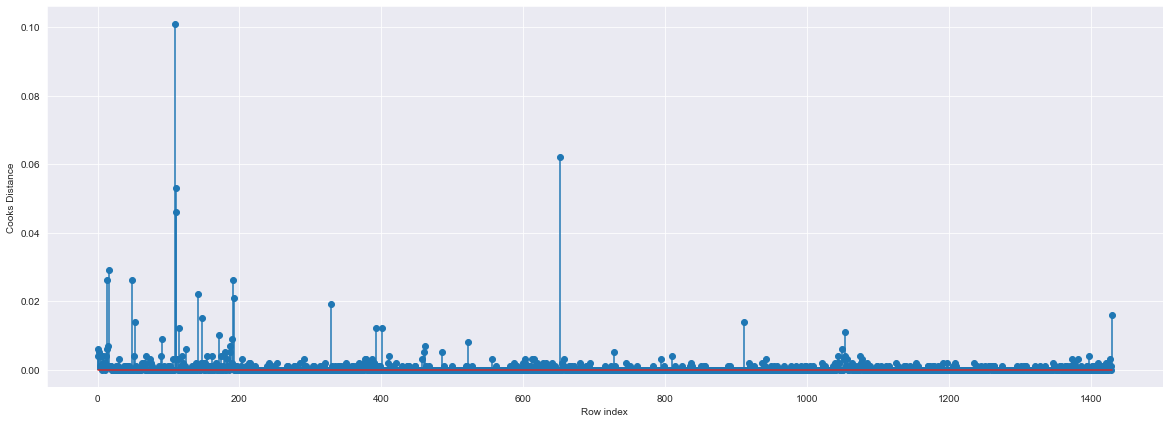

In [76]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyoto)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [77]:
(np.argmax(c_V),np.max(c_V))

(109, 0.10082355562509655)

### High Influence points

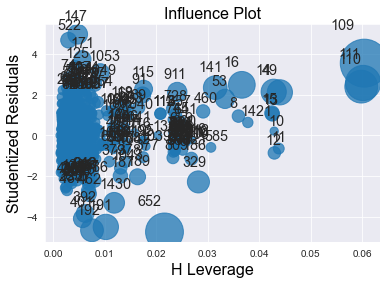

In [78]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_ml_V)
plt.show()

From the above plot, we can see that the data points 109 and 110 are influencers

### Improving the model accuracy by deleting the influencer points

In [79]:
toyoto2=toyoto.drop(toyoto.index[[109,]],axis=0)

In [80]:
toyoto2.shape

(1430, 9)

In [81]:
#Reset the index and re arrange the row values
toyoto2=toyoto2.reset_index()

In [82]:
toyoto2=toyoto2.drop(['index'],axis=1)

In [83]:
toyoto2

,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1425,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1426,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1427,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1428,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [84]:
#Build the model on the new data
final_ml_V= smf.ols('Price~Age+KM+HP+Doors+Cylinders+Gears+Weight',data = toyoto2).fit()

In [85]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8760401697366793, 24494.4397482384)

In [86]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

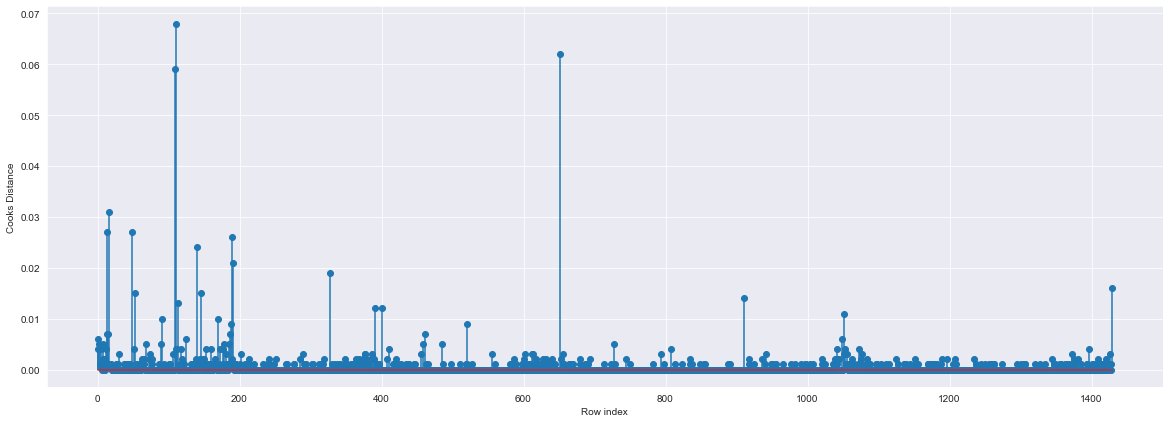

In [87]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyoto2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [88]:
(np.argmax(c_V),np.max(c_V))

(110, 0.06797937297917993)

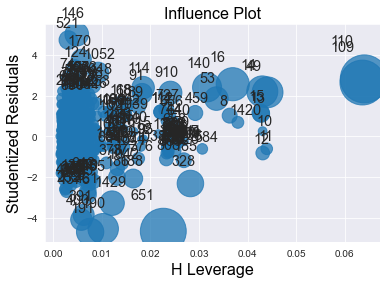

In [89]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_ml_V)
plt.show()

From the above plot, we can see that the data points 109 and 110 are influencers

In [90]:
toyoto2[toyoto2.index.isin([109,110,651])]

,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
109,TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV,31000,4,4000,116,5,4,5,1480
110,TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV,31275,4,1500,116,5,4,5,1480
651,TOYOTA Corolla 2.0 D Linea Terra 3d 2/3-Doors,6950,65,114383,90,3,4,5,1260


In [91]:

toyoto3 =toyoto2.drop(toyoto2.index[[109,110,651]],axis=0).reset_index()

In [92]:
toyoto3.shape

(1427, 10)

In [93]:
final_ml_V= smf.ols('Price~Age+KM+HP+Doors+Cylinders+Gears+Weight',data = toyoto3).fit()

In [94]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

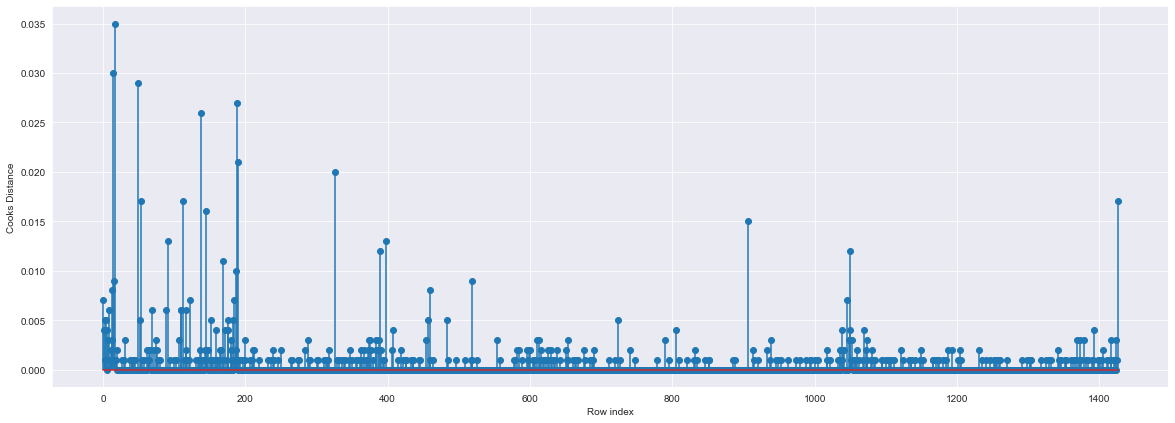

In [95]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyoto3)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

Since we have Cook's distance value <0.1, we can stop diagnostic process

### Check the accuracy of the model

In [96]:
final_ml_V= smf.ols('Price~Age+KM+HP+Doors+Cylinders+Gears+Weight',data = toyoto3).fit()

In [97]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8732943113563791, 24409.857638122445)

In [98]:
(final_ml_V.rsquared,final_ml_V.rsquared_adj)

(0.8732943113563791, 0.8727589352071807)

### Predicting for new data

In [99]:
#New data for prediction
new_data=pd.DataFrame({'Age':22,"KM":4500,"HP":100,"Doors":3,"Cylinders":4,"Gears":5,"Weight":1000},index=[1])

In [100]:
final_ml_V.predict(new_data)

1    14468.496429
dtype: float64

The Price value is 14438 for the given Age -> 22 KM KM -> 4500 HP -> 100 Doors -> 3 Cylinders -> 4 Gears -> 5 Wright -> 1000